# Kelompok 9

- Christianus Yoga Wibisono (212410101005)
- Vina Maulina Rahmawati    (212410101049)
- Amelia Puspita Wardani    (212410101025)
- Achmad Faris Fadhail      (212410101073)

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

# 1. Mengakses Dataset

In [ ]:
covid_csv = "covid_19_indonesia_time_series_all.csv"
df_covid_indonesia = pd.read_csv(covid_csv, on_bad_lines='skip')
df_covid_indonesia.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


# EDA (Eksploratory Data Analitik)

### Identifikasi Shape Dataframe

In [ ]:
df_covid_indonesia.shape

(31822, 38)

### Identifikasi Kolom Dataframe

In [ ]:
df_covid_indonesia.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

# Identifikasi Informasi Dataframe

In [ ]:
df_covid_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

# Identifikasi Missing Value

In [ ]:
df_covid_indonesia.isna().values.any() # Jika hasil False maka tidak ada missing value sedangkan True berarti kebalikannya

True

In [ ]:
df_covid_indonesia.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [ ]:
# sebelum menghapus, kita melihat korelasi antar fitur. Jika kekuatannya lemah, berarti tidak ada korelasi dan bisa didrop
df_covid_indonesia.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.715800,0.856939,0.319436,0.450040,0.437586,0.415930,0.923300,NaN,0.484002,0.492296,0.487948,0.489461,0.500920,0.471324,0.495641,0.090140,-0.033361,-0.015355,0.286930,0.070781,0.156476,0.056529,0.056529,-0.011979,0.016732
New Deaths,0.715800,1.000000,0.782872,-0.102710,0.330987,0.346205,0.299173,0.804404,NaN,0.436884,0.439943,0.439953,0.440493,0.443725,0.421582,0.447464,0.026040,-0.025241,-0.016520,0.142762,0.007347,0.260430,0.028235,0.028235,-0.014855,0.050342
New Recovered,0.856939,0.782872,1.000000,-0.214391,0.505747,0.487197,0.472292,0.938581,NaN,0.495591,0.504164,0.499614,0.501201,0.516438,0.482730,0.507414,0.093492,-0.034191,-0.015482,0.236727,0.089425,0.180736,0.073467,0.073467,-0.018184,0.030498
New Active Cases,0.319436,-0.102710,-0.214391,1.000000,-0.073337,-0.064373,-0.076223,0.021550,NaN,0.004042,0.004211,0.004132,0.004143,0.004295,0.003920,0.004307,0.001508,-0.000477,-0.000423,0.111464,-0.027011,-0.041967,-0.026442,-0.026442,0.010776,-0.025819
Total Cases,0.450040,0.330987,0.505747,-0.073337,1.000000,0.971399,0.999104,0.488342,NaN,0.711372,0.722969,0.716707,0.719237,0.732989,0.692802,0.727281,0.127365,-0.046796,-0.018845,0.061034,0.226990,0.016171,0.214913,0.214912,-0.021621,0.010321
Total Deaths,0.437586,0.346205,0.487197,-0.064373,0.971399,1.000000,0.968944,0.472512,NaN,0.727608,0.733589,0.732821,0.734144,0.738964,0.702066,0.745583,0.048907,-0.041491,-0.028510,0.027210,0.146406,0.017769,0.213480,0.213480,-0.022898,0.011221
Total Recovered,0.415930,0.299173,0.472292,-0.076223,0.999104,0.968944,1.000000,0.451488,NaN,0.699624,0.711336,0.704849,0.707497,0.721739,0.681477,0.715288,0.130019,-0.046710,-0.018464,0.053041,0.232100,0.008824,0.217775,0.217774,-0.021120,0.009583
Total Active Cases,0.923300,0.804404,0.938581,0.021550,0.488342,0.472512,0.451488,1.000000,NaN,0.556699,0.562438,0.561481,0.560506,0.565960,0.543795,0.567724,0.050788,-0.026217,-0.010467,0.215448,0.045860,0.159721,0.038254,0.038254,-0.019398,0.019433
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.484002,0.436884,0.495591,0.004042,0.711372,0.727608,0.699624,0.556699,NaN,1.000000,0.991381,0.998160,0.994205,0.996394,0.985257,0.980478,-0.063801,0.012441,0.071783,-0.022970,-0.043960,-0.008934,-0.018385,-0.018385,-0.019580,0.013303


In [ ]:
# semua data pada City Or Regency adalah NaN. Jika di dropna, semua row akan terhapus.
# drop column saja karena tidak diperlukan dalam analisa.
df_covid_indonesia.drop(columns=["City or Regency", "Special Status"], inplace=True)

In [ ]:
df_covid_indonesia.shape

(31822, 36)

In [ ]:
df_covid_indonesia.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
Province                        929
Country                           0
Continent                         0
Island                          929
Time Zone                       929
Total Regencies                   0
Total Cities                    901
Total Districts                   0
Total Urban Villages            904
Total Rural Villages            929
Area (km2)                        0
Population                        0
Population Density                0
Longitude                         0
Latitude                          0
New Cases per Million       

In [ ]:
df_covid_indonesia.dropna(inplace=True)
df_covid_indonesia.shape

(23403, 36)

In [ ]:
df_covid_indonesia.isnull().sum()

Date                           0
Location ISO Code              0
Location                       0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths per Million         0
Total Deat

In [ ]:
df_covid_indonesia.isna().values.any()

False

### Identifikasi Duplicate Value

In [ ]:
df_covid_indonesia[df_covid_indonesia.duplicated(keep=False)] # keep memiliki default parameter value True yang mana duplicate value yang ditampilkan hanya data sekunder. Jika False maka semua data duplikat ditampilkan.

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths


### Identifikasi statistika deskriptif

In [ ]:
df_covid_indonesia.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,23403.000000,23403.000000,23403.000000,23403.000000,2.340300e+04,23403.000000,2.340300e+04,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,2.340300e+04,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000
mean,200.477118,5.695552,194.228304,0.553262,7.305802e+04,2406.027219,6.758511e+04,3066.888647,12.818015,2.934538,226.556852,271.457505,2265.328120,59554.700423,8.490772e+06,300.338367,114.068023,-2.990832,27.831367,10778.258988,0.657441,288.996635,28.899665,1.277749,1.036102
std,687.909089,24.827434,706.911876,533.802535,1.465089e+05,5658.083838,1.383161e+05,9392.130191,7.428754,2.466853,176.521594,232.811692,2069.739097,61598.876312,1.169487e+07,398.463909,9.850924,3.567440,67.388500,13208.923104,2.084110,360.255041,36.025543,2.059275,1.448994
min,0.000000,0.000000,0.000000,-19976.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,4.000000,1.000000,47.000000,35.000000,275.000000,3133.000000,6.484070e+05,8.590000,99.051964,-8.682205,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-13.000000,5.827500e+03,150.000000,4.458000e+03,88.000000,8.000000,1.000000,116.000000,99.000000,928.000000,18572.000000,2.570289e+06,40.890000,106.109004,-6.456736,0.830000,1439.520000,0.000000,43.295000,4.330000,0.630000,0.670000
50%,29.000000,0.000000,22.000000,0.000000,2.562100e+04,580.000000,2.274700e+04,583.000000,11.000000,2.000000,169.000000,175.000000,1507.000000,42013.000000,4.216171e+06,103.840000,113.417654,-2.993595,6.050000,6867.420000,0.000000,160.670000,16.070000,1.000000,1.000000
75%,130.000000,3.000000,124.000000,19.000000,6.607900e+04,1885.000000,6.353450e+04,2252.500000,15.000000,4.000000,241.000000,332.000000,2435.000000,75468.000000,8.217551e+06,262.700000,121.201093,0.212037,23.480000,14560.360000,0.490000,375.780000,37.580000,1.290000,1.000000
max,16251.000000,545.000000,22667.000000,13108.000000,1.173731e+06,33489.000000,1.144358e+06,188636.000000,29.000000,9.000000,666.000000,792.000000,7809.000000,319036.000000,4.516132e+07,1276.550000,138.696030,3.916346,974.700000,70043.970000,63.800000,1632.600000,163.260000,91.000000,134.500000


# Visualisasi Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualisasi Antar Korelasi

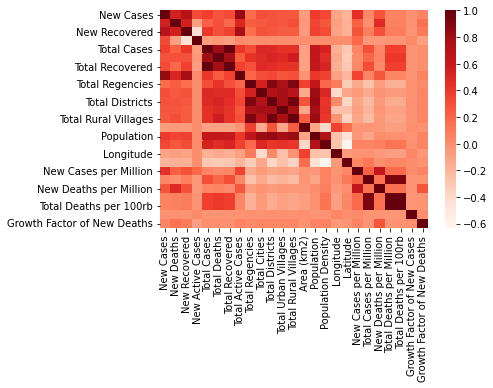

In [ ]:
sns.heatmap(data=df_covid_indonesia.corr(), cmap=plt.cm.Reds)

### Meneliti Fatality Ratio

In [ ]:
df_covid_indonesia["fatality_ratio"] = df_covid_indonesia["Total Deaths"] / df_covid_indonesia["Total Cases"]
df_covid_indonesia.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,fatality_ratio
7,3/3/2020,ID-RI,Riau,0,0,0,0,1,0,1,0,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.16,0.0,0.00,0.0,0.00%,100.00%,0.0,1.0,0.000000
10,3/4/2020,ID-JB,Jawa Barat,1,0,0,1,2,1,60,-59,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.04,0.0,0.02,0.0,50.00%,3000.00%,1.0,0.0,0.500000
11,3/4/2020,ID-RI,Riau,0,0,0,0,1,0,1,0,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.16,0.0,0.00,0.0,0.00%,100.00%,1.0,1.0,0.000000
14,3/5/2020,ID-JB,Jawa Barat,1,0,0,1,3,1,60,-58,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.07,0.0,0.02,0.0,33.33%,2000.00%,1.0,1.0,0.333333
15,3/5/2020,ID-RI,Riau,0,0,0,0,1,0,1,0,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.16,0.0,0.00,0.0,0.00%,100.00%,1.0,1.0,0.000000


### Meneliti Kota-Kota dengan Fatality Ratio Tertinggi (2020 - 2022)

In [ ]:
df_top_20_fatality_rate = df_covid_indonesia.sort_values("fatality_ratio", ascending=False)
df_top_20_fatality_rate = df_top_20_fatality_rate[["Location", "fatality_ratio"]].groupby("Location").sum().sort_values("fatality_ratio", ascending=False)
df_top_20_fatality_rate.head(20)

,fatality_ratio
Location,
Jawa Tengah,84.896681
Jawa Timur,77.146243
Banten,63.954452
Lampung,47.555824
Sumatera Selatan,47.356280
Sumatera Utara,42.773200
Bali,36.923525
Kepulauan Riau,35.104069
Sulawesi Utara,34.733008


### Visualisasi Fatality Ratio Tertinggi (2020 - 2022)

In [ ]:
plt.figure(figsize=(8,8))
df_top_20_fatality_rate["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries 2020 - 2022", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

### Reformat DataFrame Menjadi Index DateTime

In [ ]:
df_covid_indonesia['Date'] = pd.to_datetime(df_covid_indonesia['Date'])
df_covid_indonesia_reformat = df_covid_indonesia.set_index("Date").sort_index()
df_covid_indonesia_reformat.head()

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,fatality_ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-03,ID-RI,Riau,0,0,0,0,1,0,1,0,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.16,0.0,0.00,0.0,0.00%,100.00%,0.0,1.0,0.000000
2020-03-04,ID-JB,Jawa Barat,1,0,0,1,2,1,60,-59,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.04,0.0,0.02,0.0,50.00%,3000.00%,1.0,0.0,0.500000
2020-03-04,ID-RI,Riau,0,0,0,0,1,0,1,0,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.16,0.0,0.00,0.0,0.00%,100.00%,1.0,1.0,0.000000
2020-03-05,ID-JB,Jawa Barat,1,0,0,1,3,1,60,-58,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.07,0.0,0.02,0.0,33.33%,2000.00%,1.0,1.0,0.333333
2020-03-05,ID-RI,Riau,0,0,0,0,1,0,1,0,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.16,0.0,0.00,0.0,0.00%,100.00%,1.0,1.0,0.000000


### Meneliti Fatality Ratio Tertinggi Tahun 2022

In [ ]:
df_top_20_fatality_rate_on_2022 = df_covid_indonesia_reformat.sort_values("fatality_ratio", ascending=False)
df_top_20_fatality_rate_on_2022 = df_top_20_fatality_rate_on_2022[["Location", "fatality_ratio"]].loc["2022"].groupby("Location").sum().sort_values("fatality_ratio", ascending=False)
df_top_20_fatality_rate_on_2022.head(20)

,fatality_ratio
Location,
Jawa Timur,12.979676
Lampung,12.733644
Jawa Tengah,12.170946
Sumatera Selatan,9.012198
Gorontalo,7.669159
Bali,6.668854
Kalimantan Timur,6.621094
Riau,6.371200
Daerah Istimewa Yogyakarta,6.336362


### Visualisasi Fatality Ratio Tertinggi (2022)

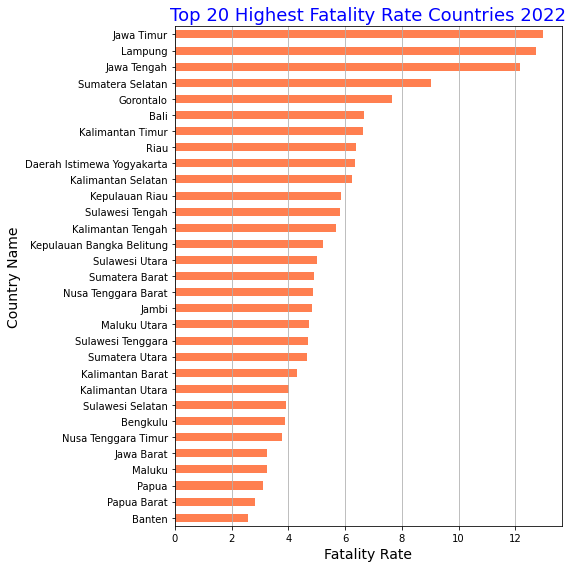

In [ ]:
plt.figure(figsize=(8,8))
df_top_20_fatality_rate_on_2022["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries 2022", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

### Analisis Data 2022 Kasus Baru

<Figure size 432x288 with 0 Axes>

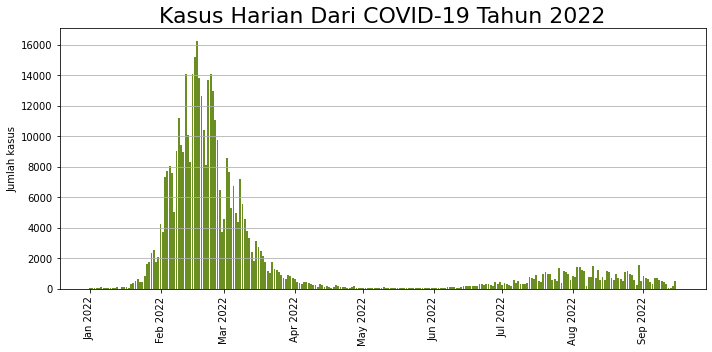

In [225]:
import matplotlib.dates as mdates
df_covid_2022 = df_covid_indonesia_reformat.loc["2022"]
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=df_covid_indonesia_reformat, x=df_covid_2022.index.values, height=df_covid_2022["New Cases"], color='olivedrab')
ax.set_title('Kasus Harian Dari COVID-19 Tahun 2022',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Analisis Sembuh Baru 2022

<Figure size 432x288 with 0 Axes>

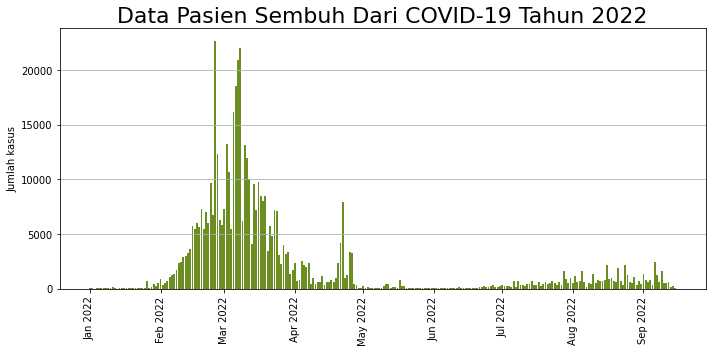

In [226]:
df_covid_2022 = df_covid_indonesia_reformat.loc["2022"]
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=df_covid_indonesia_reformat, x=df_covid_2022.index.values, height=df_covid_2022["New Recovered"], color='olivedrab')
ax.set_title('Data Pasien Sembuh Dari COVID-19 Tahun 2022',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Analisis Meninggal Baru 2022

<Figure size 432x288 with 0 Axes>

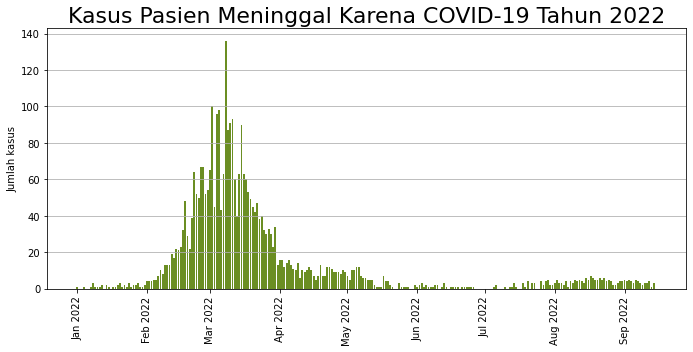

In [224]:
df_covid_2022 = df_covid_indonesia_reformat.loc["2022"]
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=df_covid_indonesia_reformat, x=df_covid_2022.index.values, height=df_covid_2022["New Deaths"], color='olivedrab')
ax.set_title('Kasus Pasien Meninggal Karena COVID-19 Tahun 2022',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()